<a href="https://colab.research.google.com/github/udayameister/GenAI/blob/main/02_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision: Part 2 - Manipulating Image (Preprocessing)

# Blurring

The goal of blurring is to perform noise reduction.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img1.png?raw=true)

There are several techniques used to achieve blurring effects but we're going to talk about the four major ones used in OpenCV: **Averaging blurring, Gaussian blurring, median blurring** and **bilateral filtering**.

***Average blurring*** is taking the average of all the pixel values under the given kernel area and replace the value at the center.
![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img2.png?raw=true)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dir = '/content/'

In [3]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

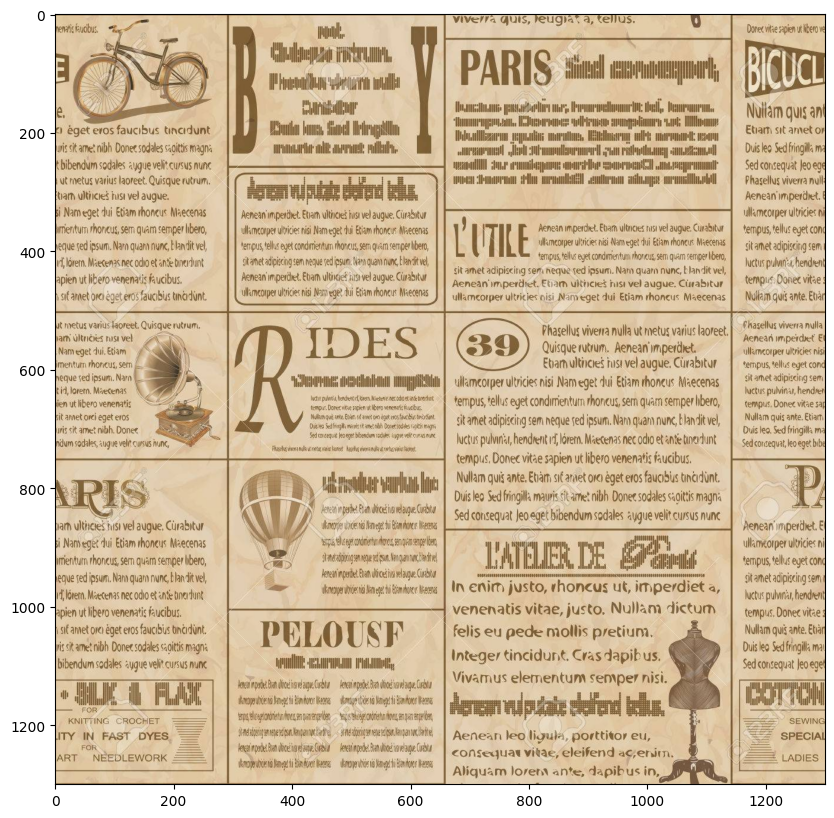

In [5]:
import cv2
img_text = cv2.imread(dir + '/text.jpg')
img_text = cv2.cvtColor(img_text, cv2.COLOR_BGR2RGB)
display(img_text)

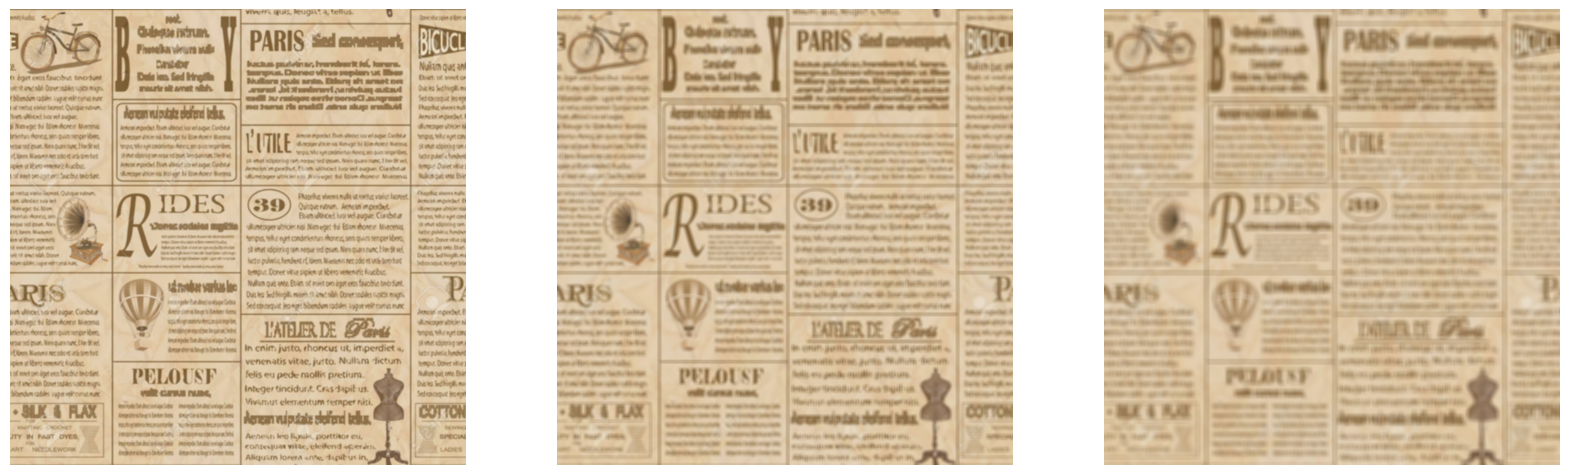

In [6]:
img = img_text.copy()
kernels = [5, 11, 17]

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()

***Medium blurring***

***Gaussian blurring***

***Bilateral Filtering***
![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img3.png?raw=true)

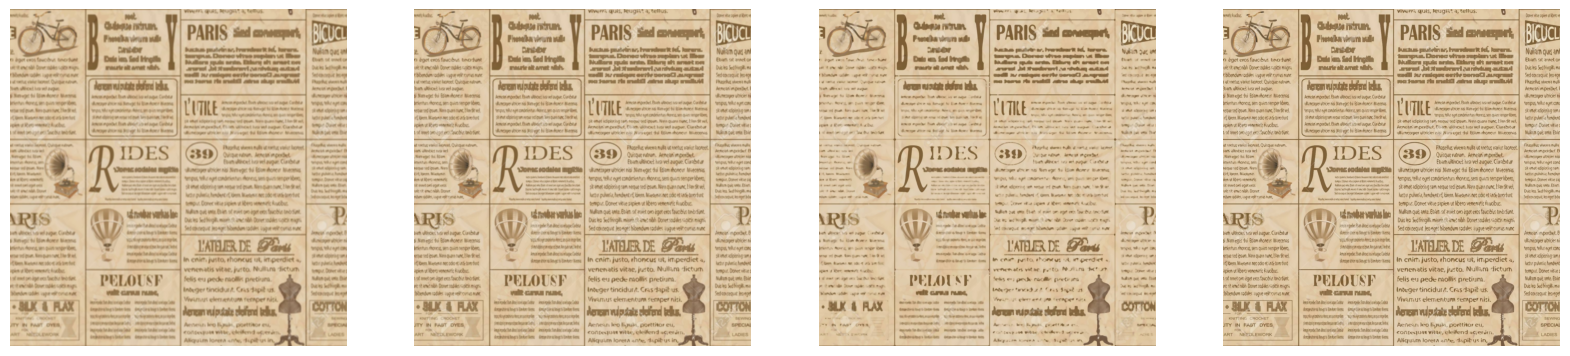

In [7]:
# Blur the image
img_0 = cv2.blur(img, ksize = (7, 7))
img_1 = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)
img_2 = cv2.medianBlur(img, 7)
img_3 = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)

# Plot the images
images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))

for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()

# Threshold

There are five different types of thresholding:

**Binary**

**the inverse of Binary**

**Threshold to zero**

**the inverse of Threshold to Zero** and

**Threshold truncation.**

In [16]:
img = cv2.imread(dir + '/giraffe.jpg')

In [17]:
# Thresholding
_, thresh_0 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, thresh_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

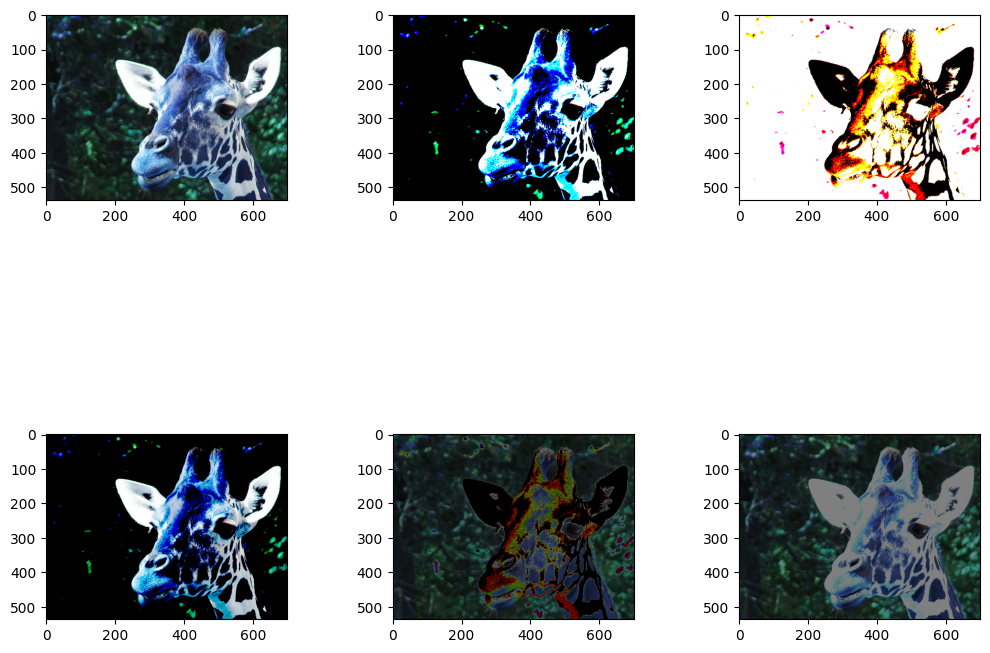

In [18]:
# Plot the images
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))

for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)

plt.tight_layout(w_pad = 5)
plt.show()

# Adaptive Thresholding

In [20]:
img_text = cv2.imread(dir + '/text.jpg')
img = cv2.cvtColor(img_text, cv2.COLOR_BGR2GRAY)

# Adaptive Thresholding
_, thresh_binary = cv2.threshold(img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv2.adaptiveThreshold(img, 255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 7, 8)

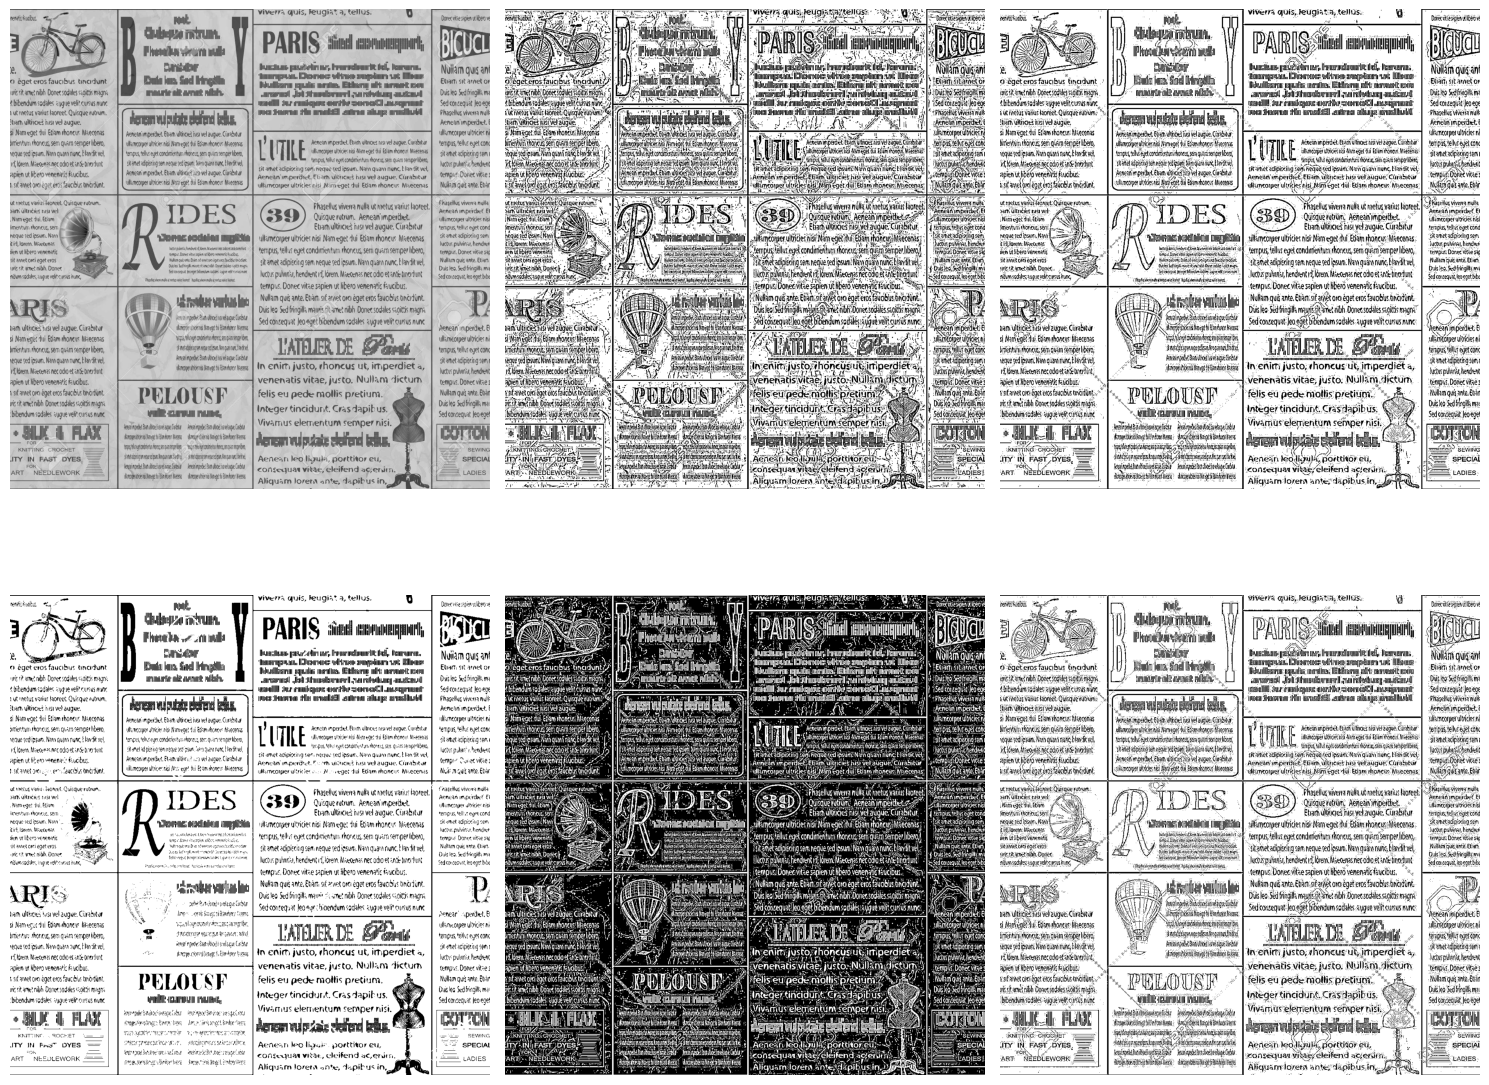

In [21]:
# Plot the images
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 13))

for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Gradient

In mathematics, the gradient geometrically represents the slope of the graph of a function with multi-variables. As it is a vector-valued function, it takes a direction and a magnitude as its components.

***Sobel operation*** uses both Gaussian smoothing and differentiation.

***Laplacian operation*** uses the second derivatives of x and y. The mathematical expression is shown below.
![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img5.png?raw=true)

In [22]:
# Apply gradient filtering
sobel_x = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

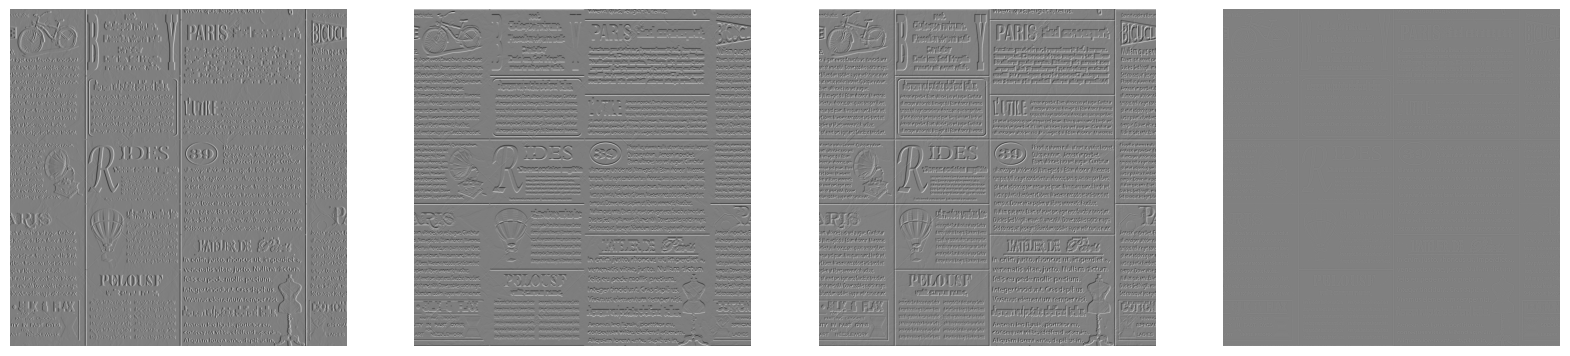

In [23]:
# Plot the images
images = [sobel_x, sobel_y, blended, laplacian]

plt.figure(figsize = (20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')
plt.show()

# Morphological transformations

It's also possible to manipulate the figures of images by filtering, which is called as **morphological transformation**.

***Erosion*** is the technique for shrinking figures and it's usually processed in a grayscale. The shape of filters can be a rectangle, an ellipse, and a cross shape. By applying a filter we remove any 0 values under the given area.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img6.png?raw=true)

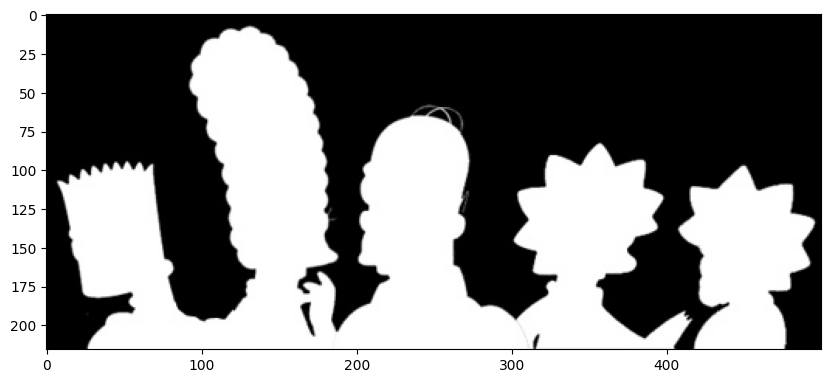

In [25]:
img = cv2.imread(dir + '/simpson.jpg')
img = cv2.bitwise_not(img)
display(img)

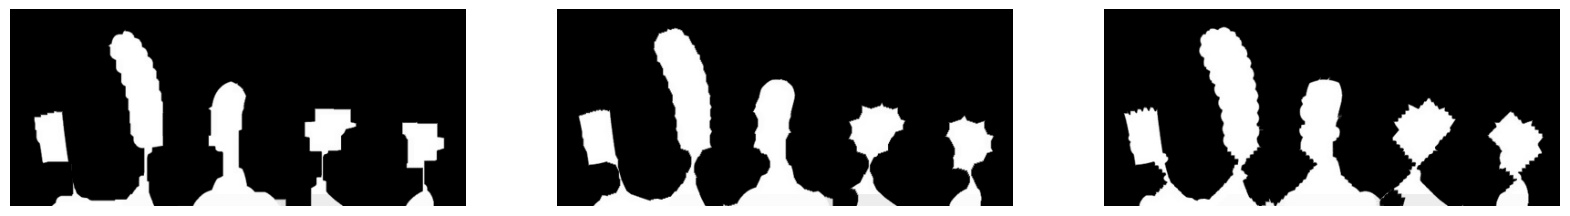

In [26]:
# Create the erosion kernels
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
kernels = [kernel_0, kernel_1, kernel_2]

# Plot the images
plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv2.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

---





**Dilation** is the opposite to erosion. It is making objects expand and the operation will be also be opposite to that of erosion. Let's check out the result with the code as follows.

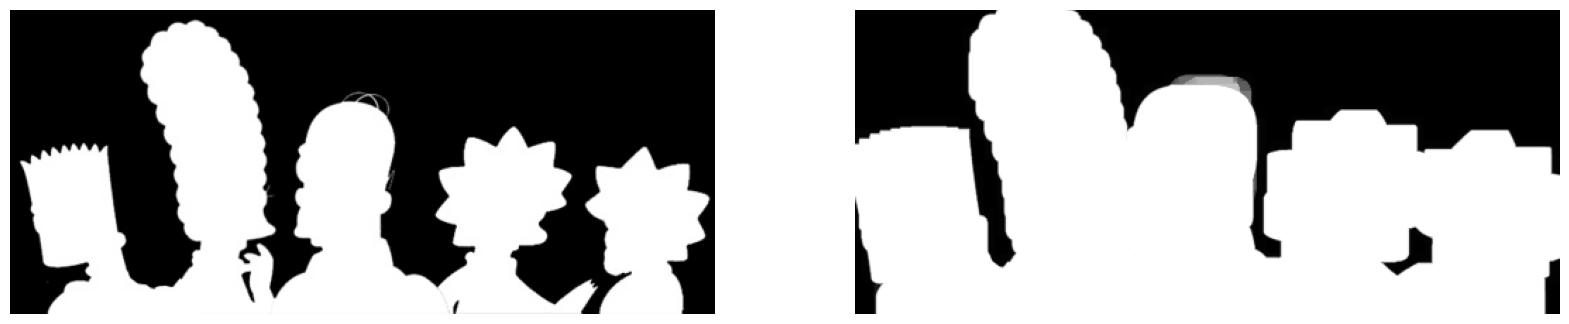

In [27]:
kernel = np.ones((9, 9), np.uint8)
img_dilate = cv2.dilate(img, kernel, iterations = 3)

plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray")
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_dilate, cmap="gray")
plt.axis('off')
plt.show()

**Opening** and **Closing** Operation is the mixed version of erosion and dilation. Opening performs erosion first and then dilation is performed on the result from the erosion while closing performs dilation first and the erosion.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img7.png?raw=true)

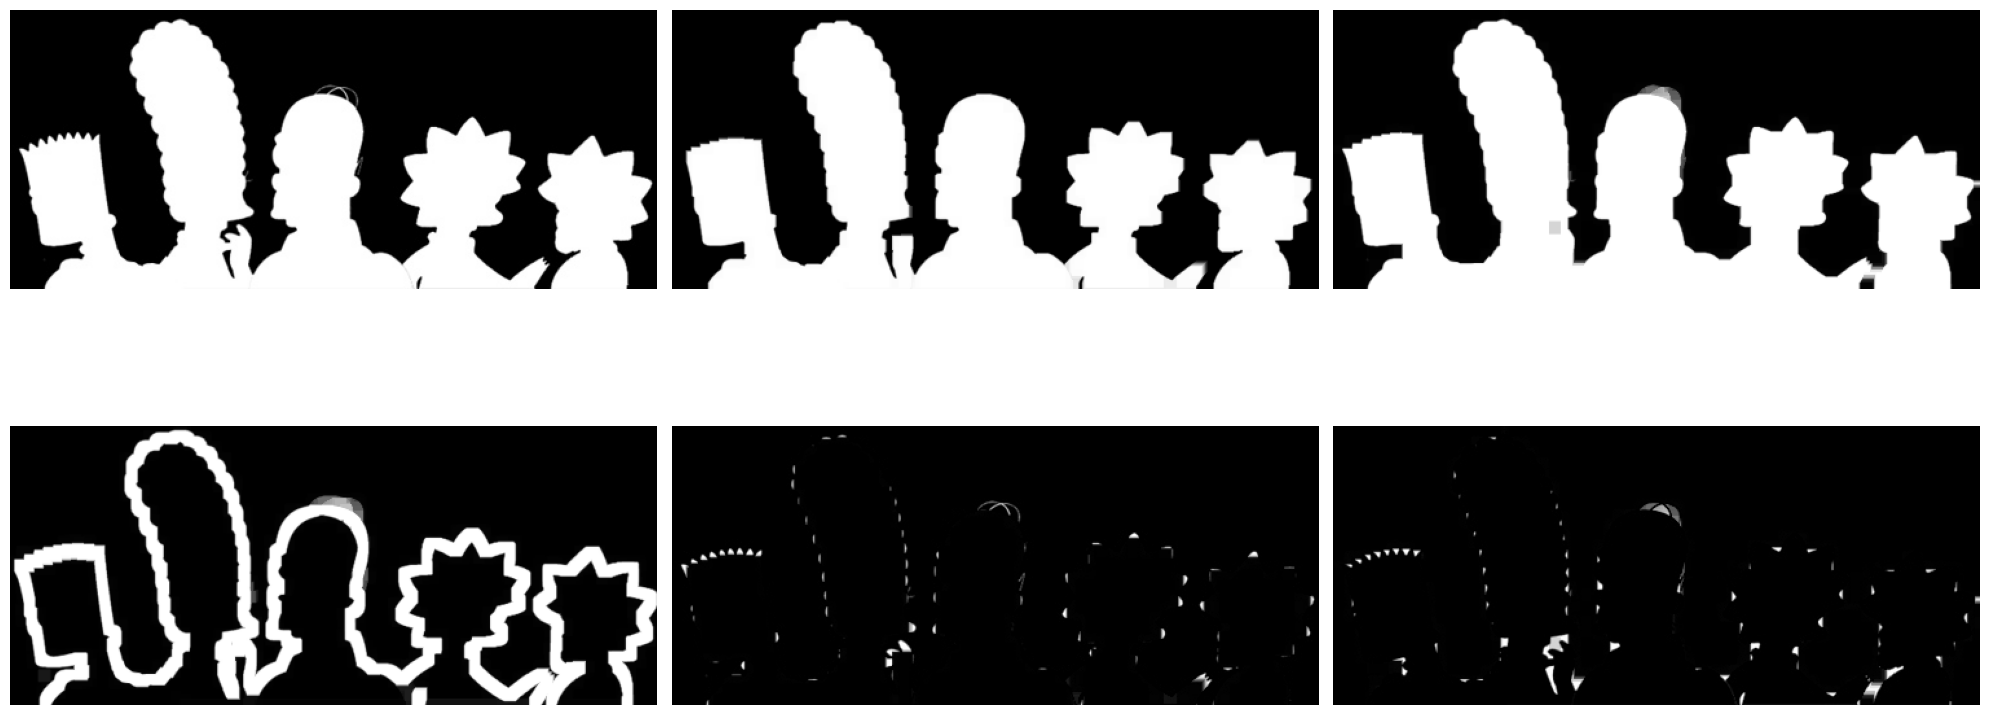

In [28]:
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT,kernel)
img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

images = [img, img_open, img_close, img_grad, img_tophat, img_blackhat]

plt.figure(figsize = (20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')

plt.tight_layout()
plt.show()